<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [187]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [124]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/marketing_campaign.csv", sep='\t')

In [125]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [126]:
# Виводимо кількість рядків та колонок
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість колонок: {df.shape[1]}")

Кількість рядків: 2240
Кількість колонок: 29


In [127]:
# Виводимо типи даних для кожної колонки
print("\nТипи даних кожної колонки:")
print(df.dtypes)


Типи даних кожної колонки:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [128]:
# Виводимо кількість пропущених значень у кожній колонці
print("\nПропущені значення у кожній колонці:")
print(df.isnull().sum())


Пропущені значення у кожній колонці:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [129]:
# Виводимо основну інформацію про дані
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. Таблиця marketing_campaign.csv містить 2240 рядків та 29 колонок.
2. Типи даних колонок: більшість колонок мають тип даних int64, одна колонка має тип float64, і три колонки мають тип object.
3. У колонці Income було виявлено 24 пропущених значення. Всі інші колонки не мають пропусків.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Для завдання кластеризації доцільно використовувати заповнення пропущених значень медіаною. Оскільки вона є стійкою до викидів і зберігає загальну тенденцію розподілу, що важливо для подальшої кластеризації. Це дозволяє уникнути перекосів у даних, які можуть вплинути на результати кластеризації.

In [130]:
# Заповнюємо пропущені значення в колонці Income медіаною
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Перевіряємо, чи всі пропущені значення заповнені
df['Income'].isnull().sum()

0

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

Для обробки категоріальних колонок і колонки з датою перед передачею їх в алгоритм кластеризації необхідно виконати декілька кроків.

Категоріальні колонки слід перетворити на числовий формат, щоб алгоритми кластеризації могли їх обробляти. Існують два основні методи:

- One-Hot Encoding: Перетворює кожне категоріальне значення у окрему бінарну (0 або 1) колонку. Це підходить, якщо кількість унікальних значень невелика.
- Label Encoding: Перетворює кожне категоріальне значення у унікальне ціле число. Використовується, якщо існує порядок серед категорій або якщо кількість категорій велика.


Для даного завдання, якщо категоріальні колонки не мають порядку, One-Hot Encoding є кращим вибором, оскільки він не вводить штучний порядок.

In [131]:
df.select_dtypes(include = "object").columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [134]:
# Визначаємо категоріальні колонки, виключаючи Dt_Customer
categorical_columns = df.select_dtypes(include='object').columns.drop('Dt_Customer')

# Застосування One-Hot Encoding до категоріальних колонок
df_encoded = pd.get_dummies(df, columns=categorical_columns).map(lambda x: 1 if x is True else (0 if x is False else x))

Колонку з датою можна перетворити у декілька корисних ознак:

- Рік реєстрації, місяць реєстрації: Ці значення можуть бути корисними для розуміння сезонності або довготривалості клієнта з компанією.
- Час з моменту реєстрації: Різниця між поточною датою і датою реєстрації може показати, як довго клієнт є активним.

In [135]:
# Обробка колонки з датою з урахуванням того, що перший йде день, а потім місяць
df_encoded['Year_Customer_Since'] = pd.to_datetime(df_encoded['Dt_Customer'], dayfirst=True).dt.year
df_encoded['Month_Customer_Since'] = pd.to_datetime(df_encoded['Dt_Customer'], dayfirst=True).dt.month
df_encoded['Customer_For'] = 2024 - df_encoded['Year_Customer_Since']  #  поточний рік 2024

# Видалення оригінальної колонки з датою, оскільки вона вже перетворена
df_encoded.drop('Dt_Customer', axis=1, inplace=True)

# Перевірка результату
df_encoded.head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Customer_Since,Month_Customer_Since,Customer_For
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,0,0,0,2012,9,12
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,1,0,0,0,2014,3,10
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,2013,8,11
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,2014,2,10
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,1,0,0,0,0,2014,1,10


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [136]:
# Вибір числових колонок для кластеризації
X = df_encoded.select_dtypes(include=['int64', 'float64']).copy()

# Перевірка вибраних даних
X.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0


In [137]:
 # Створення моделі KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42,  n_init='auto')
labels = kmeans.fit_predict(X)

In [138]:
# Обчислення метрики силуету
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.4888204745136686

Це значення вказує на те, що кластери в вашій кластеризації розподілені відносно добре, але все ще є деякі накладання або незначна невизначеність між кластерами.
Це середній результат, який може бути задовільним залежно від конкретного завдання. Однак, можливо, варто розглянути можливість оптимізації кількості кластерів або перегляду вибору ознак, які використовуються для кластеризації.

Трохи спробуємо зрозуміти розподіл


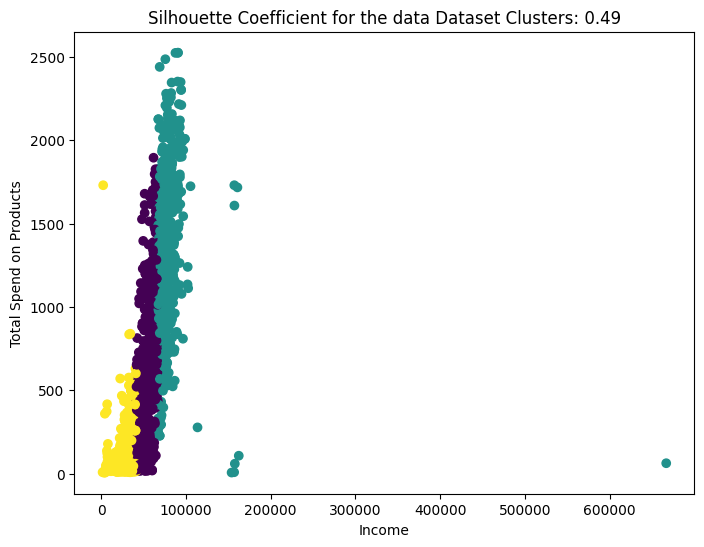

In [141]:
# Візуалізація кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X['Income'], X['MntWines'] + X['MntFruits'] + X['MntMeatProducts'] + X['MntFishProducts'] + X['MntSweetProducts'] + X['MntGoldProds'], c=labels, cmap='viridis')
plt.title(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_avg:.2f}')
plt.xlabel('Income')
plt.ylabel('Total Spend on Products')
plt.show()

Візуалізація показує, що більшість клієнтів зосереджені в діапазоні доходу до 100 000, і їхні витрати на продукти також залишаються в межах 1000-2000. Однак є декілька клієнтів з високими доходами (понад 200 000), які витрачають значно більше на продукти.
Кластери перекриваються, що свідчить про те, що клієнти з різними рівнями доходу можуть мати схожі витрати на продукти.

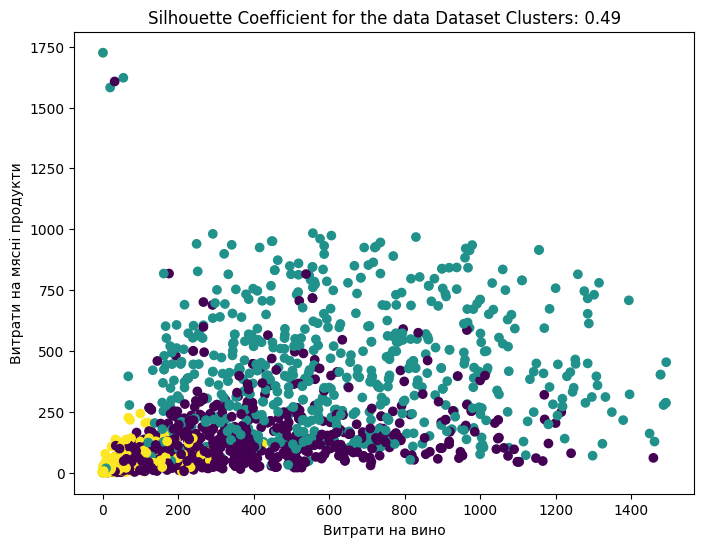

In [147]:
# Візуалізація витрат на вино та м'ясні продукти
plt.figure(figsize=(8, 6))
plt.scatter(X['MntWines'], X['MntMeatProducts'], c=labels, cmap='viridis')
plt.title(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_avg:.2f}')
plt.xlabel('Витрати на вино')
plt.ylabel('Витрати на мясні продукти')
plt.show()

Витрати на вино та м'ясні продукти мають широке розподілення, і ми бачимо, що клієнти з вищими витратами на вино зазвичай витрачають більше і на м'ясні продукти.
Кластери також перекриваються, що вказує на те, що для поділу клієнтів за цими параметрами необхідні додаткові ознаки.

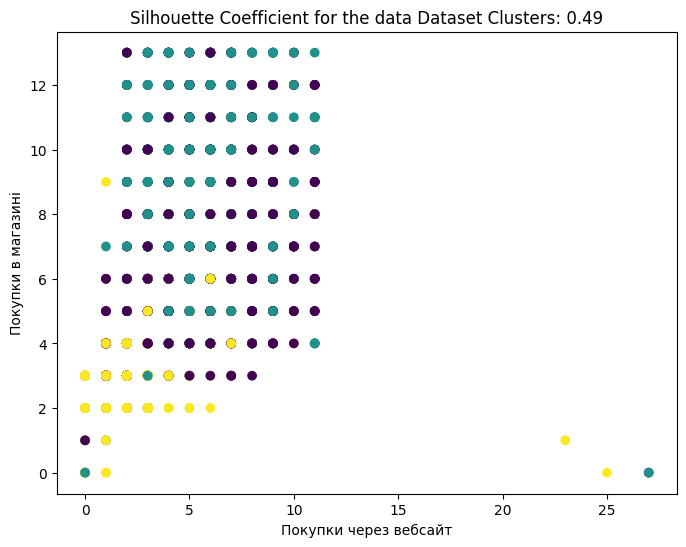

In [148]:
# Візуалізація кількості покупок онлайн і в магазині
plt.figure(figsize=(8, 6))
plt.scatter(X['NumWebPurchases'], X['NumStorePurchases'], c=labels, cmap='viridis')
plt.title(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_avg:.2f}')
plt.xlabel('Покупки через вебсайт')
plt.ylabel('Покупки в магазині')
plt.show()

Більшість клієнтів роблять відносно небагато покупок через вебсайт (до 10) та більше покупок у магазині (до 12).
Видно чітке групування, однак є декілька клієнтів, які здійснюють значно більше покупок через вебсайт, що може бути окремою категорією клієнтів.

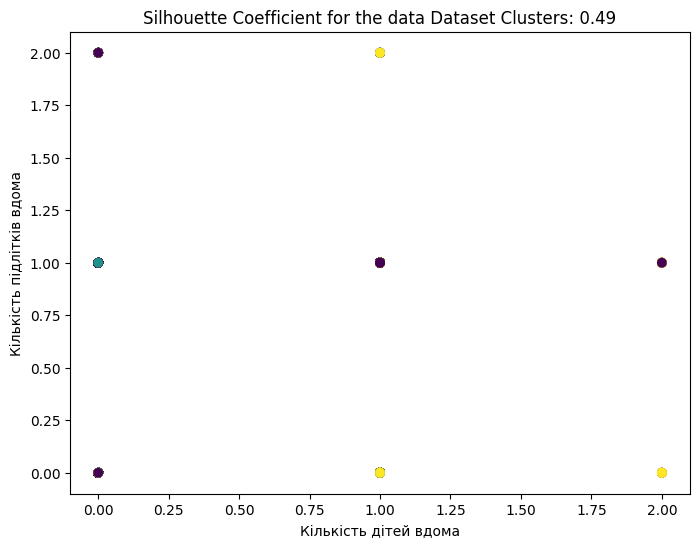

In [149]:
# Візуалізація кількості дітей і підлітків вдома
plt.figure(figsize=(8, 6))
plt.scatter(X['Kidhome'], X['Teenhome'], c=labels, cmap='viridis')
plt.title(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_avg:.2f}')
plt.xlabel('Кількість дітей вдома')
plt.ylabel('Кількість підлітків вдома')
plt.show()

Кількість дітей та підлітків вдома демонструє чітке розділення між кластерами, що може свідчити про значний вплив цих факторів на поведінку клієнтів.
Кластери виглядають добре розділеними, що говорить про те, що ця ознака є важливою для кластеризації.

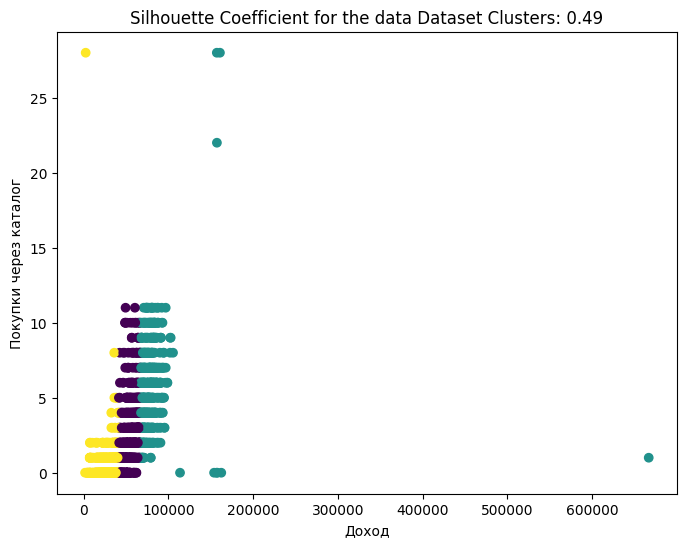

In [150]:
# Візуалізація доходу та кількості покупок через каталог
plt.figure(figsize=(8, 6))
plt.scatter(X['Income'], X['NumCatalogPurchases'], c=labels, cmap='viridis')
plt.title(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_avg:.2f}')
plt.xlabel('Доход')
plt.ylabel('Покупки через каталог')
plt.show()


Клієнти з низькими доходами частіше роблять покупки через каталог, хоча є кілька клієнтів з високим доходом, які також активно користуються каталогом.
Знову ж таки, видно деяке перекриття кластерів, особливо серед клієнтів із середніми доходами.

Загальні висновки:
- Кластеризація дала змогу виділити кілька груп клієнтів, але є певне перекриття між кластерами, що може свідчити про те, що вибрані ознаки недостатньо добре розділяють клієнтів на окремі групи.
- Можливо, слід розглянути додаткові ознаки або змінити кількість кластерів, щоб покращити результати.
- Коефіцієнт силуету в 0.49 підтверджує, що кластери мають деяку невизначеність і не є ідеально розділеними.

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [156]:
# Створюємо нову ознаку - сумарні витрати на всі продукти
df_encoded['Total_Spend'] = df_encoded[['MntWines', 'MntFruits', 'MntMeatProducts',
                                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Створюємо 3D-графік
fig = px.scatter_3d(
    df_encoded,
    x='Income',  # Дохід
    y='Recency',  # Кількість днів з моменту останньої покупки
    z='Total_Spend',  # Сумарні витрати на продукти
    color='Marital_Status_Married',  # Вибираємо одну з колонок для кольору
    title="3D Visualization of Clusters",
    labels={
        'Income': 'Дохід',
        'Recency': 'Час з моменту останньої покупки',
        'Total_Spend': 'Сумарні витрати на продукти',
    }
)

fig.show()


Графік, який ви побудували, показує взаємозв'язок між доходом клієнтів, їхніми витратами на продукти, і тим, як давно вони здійснювали останню покупку. Кольором позначено сімейний статус клієнтів, зокрема, чи одружені вони (Marital_Status_Married).

1. Більшість клієнтів мають доходи в межах від 0 до 200 тисяч, що є очікуваним для більшості сегментів. Вищі доходи зустрічаються рідше.
2.  Більшість клієнтів мають витрати на продукти в межах до 1000 одиниць. Є кілька клієнтів з дуже високими витратами, що може вказувати на окремий сегмент клієнтів з високими доходами.
3. Сімейний статус клієнтів (одружені чи ні) не дає явного розподілу на кластери за трьома параметрами (дохід, витрати, час з моменту останньої покупки). Це може свідчити про те, що сімейний статус не є ключовим фактором у кластеризації клієнтів за цими параметрами.
4. Клієнти, які недавно здійснили покупку, розподілені по всьому діапазону доходів і витрат, але немає явних кластерів, що могли б чітко виділити якусь групу клієнтів.

Висновки:
Зважаючи на ці фактори, можемо зробити висновок, що обрані параметри (дохід, витрати на продукти, час з моменту останньої покупки) не створюють чітких кластерів клієнтів. Можливо, варто спробувати інші параметри, такі як кількість покупок через різні канали (вебсайт, магазини, каталоги) або аналізувати вплив інших категорійних ознак. Це може допомогти краще розділити клієнтів на сегменти, які мають значущі відмінності.

In [158]:
# Додамо загальні витрати на продукти до DataFrame
df_encoded['Total_Spend'] = df_encoded[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Створюємо 3D-графік
fig = px.scatter_3d(
    df_encoded,
    x='Income',  # Дохід
    y='Total_Spend',  # Сумарні витрати на продукти
    z='NumDealsPurchases',  # Кількість покупок за знижками
    color='Marital_Status_Married',  # Колір за сімейним станом (одружені)
    title='3D Visualization of Clusters'
)

# Відображаємо графік
fig.show()


Цей графік дає нам змогу побачити, як доходи клієнтів (Income), їхні загальні витрати на продукти (Total_Spend), та кількість покупок за знижками (NumDealsPurchases) корелюють з сімейним станом (одружені чи ні).

Що можна сказати на основі цього графіку:
1. Всі групи клієнтів переважно мають доходи до 200 тисяч, хоча є кілька клієнтів із значно вищими доходами. Чітка класифікація за доходами не спостерігається.
2.  Клієнти з низькими доходами (до 100 тисяч) і витратами до 1000 демонструють певну групування, але немає чіткої межі між групами за витратами.
3. Видно, що деякі клієнти, навіть з високими витратами, все ще активно користуються знижками.

In [157]:
# Створюємо 3D-графік для нових ознак
fig = px.scatter_3d(
    df_encoded,
    x='NumWebPurchases',  # Кількість покупок через вебсайт
    y='NumStorePurchases',  # Кількість покупок у магазині
    z='NumCatalogPurchases',  # Кількість покупок через каталог
    color=labels,  # Використовуємо отримані раніше кластери
    title="3D Visualization of Clusters",
    labels={
        'NumWebPurchases': 'Покупки через вебсайт',
        'NumStorePurchases': 'Покупки в магазині',
        'NumCatalogPurchases': 'Покупки через каталог'
    }
)

# Відображаємо графік
fig.show()



Дивлячись на цей графік, можна помітити, що точки, які представляють клієнтів, здебільшого зосереджені в одній частині простору. Це може свідчити про недостатню диференціацію між кластерами. Така ситуація може вказувати на те, що обрані ознаки (кількість покупок через вебсайт, у магазині та через каталог) недостатньо добре розрізняють клієнтів на чіткі сегменти. Можливо, клієнти демонструють схожу поведінку за цими параметрами.

Для кращого аналізу я б запропонувала:

1. Наприклад, можна використати поєднання фінансових показників (дохід, загальні витрати) з показниками взаємодії з акціями (наприклад, AcceptedCmp1, AcceptedCmp2 тощо).
2. Проаналізувати додаткові характеристики. Включіть характеристики, такі як сімейний стан, рівень освіти, щоб перевірити, чи впливає це на розподіл клієнтів по кластерах.
3. Ознаки можуть мати різний масштаб, що може впливати на результати кластеризації. Нормалізація може допомогти покращити розподіл кластерів.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [162]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X - це ваш датасет з числовими ознаками

# Створення моделі KMeans після масштабування
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Обчислення метрики силуету після масштабування
silhouette_scaled = silhouette_score(X_scaled, labels_scaled)

In [163]:
# Порівняння результатів
print(f'Силует до масштабування: {silhouette_avg:.3f}')
print(f'Силует після масштабування: {silhouette_scaled:.3f}')

Силует до масштабування: 0.489
Силует після масштабування: 0.089


Масштабування в цьому випадку призвело до значного погіршення якості кластеризації. Це може бути пов'язано з тим, що після масштабування деякі ознаки втратили свою відносну вагу, що негативно вплинуло на роботу алгоритму KMeans. Відповідно, у цьому конкретному випадку краще використовувати кластеризацію на оригінальних даних без масштабування.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [164]:
# Визначаємо функцію для видалення викидів на основі IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Спробуэмо видалити викиди за доходом та загальними витратами
df_no_outliers = remove_outliers(df_encoded, 'Income')
df_no_outliers = remove_outliers(df_no_outliers, 'Total_Spend')

# Перевіряємо розмір даних після видалення викидів
print(f"Розмір даних до видалення викидів: {df_encoded.shape}")
print(f"Розмір даних після видалення викидів: {df_no_outliers.shape}")

Розмір даних до видалення викидів: (2240, 44)
Розмір даних після видалення викидів: (2229, 44)


In [165]:
# Заново проводимо кластеризацію на очищених даних
X_no_outliers = df_no_outliers.select_dtypes(include=['int64', 'float64'])
kmeans_no_outliers = KMeans(n_clusters=3, random_state=42,  n_init='auto')
labels_no_outliers = kmeans_no_outliers.fit_predict(X_no_outliers)

# Обчислення метрики силуету
silhouette_no_outliers = silhouette_score(X_no_outliers, labels_no_outliers)
print(f"Силует після видалення викидів: {silhouette_no_outliers:.3f}")

Силует після видалення викидів: 0.499


В результаті видалення викидів метрика силуету покращилася з 0.089 (після масштабування) та  0.489 (до масштабування) до 0.499. Це свідчить про те, що видалення викидів позитивно вплинуло на якість кластеризації. Відповідно, можна зробити висновок, що дані містили викиди, які значно погіршували результати кластеризації, і їх видалення допомогло побудувати більш чіткі та добре відокремлені кластери.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

In [166]:
# Визначаємо діапазон можливих значень кількості кластерів
range_n_clusters = list(range(1, 11))

# Створюємо список для збереження значень інерції для кожної кількості кластерів
inertias = []

# Запускаємо цикл для кожної кількості кластерів
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_no_outliers)
    inertias.append(kmeans.inertia_)

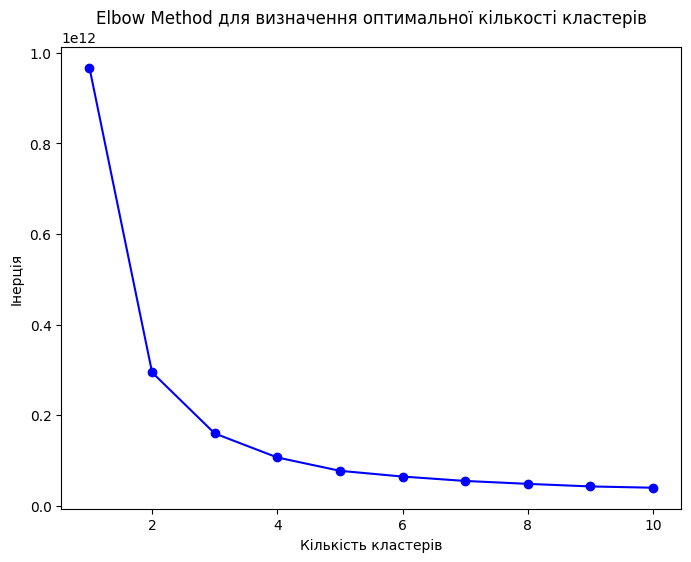

In [167]:
# Візуалізація методу Elbow
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Elbow Method для визначення оптимальної кількості кластерів')
plt.show()

На основі графіка, отриманого за допомогою методу Elbow, можна зробити висновок, що оптимальна кількість кластерів знаходиться в діапазоні від 3 до 4. Саме в цих точках на графіку спостерігається значне зниження інерції, після чого темп зменшення уповільнюється.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [169]:
# Побудова зв'язок для кластеризації за допомогою single linkage
linked = linkage(X_no_outliers, method='single')

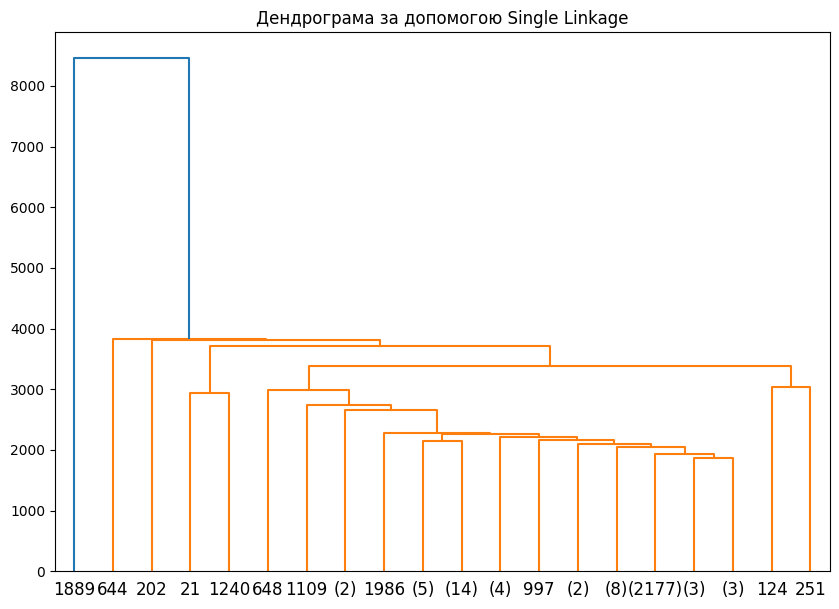

In [170]:
# Візуалізація дендрограми
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20)  # truncate_mode='lastp' для обрізання дендрограми
plt.title('Дендрограма за допомогою Single Linkage')
plt.show()

Хочу спробувати побудувати для 2 і 3 кластерів, хоча за графіком ліпше 2


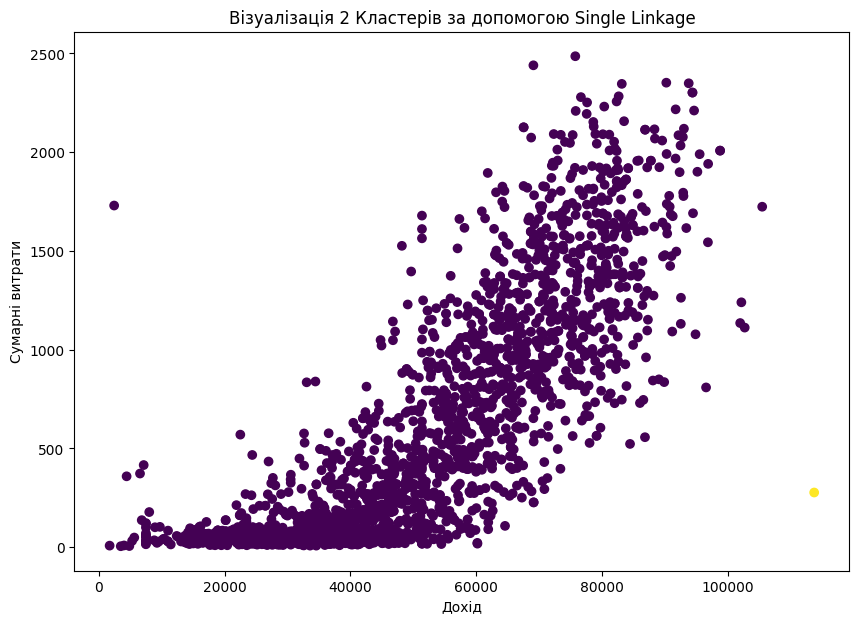

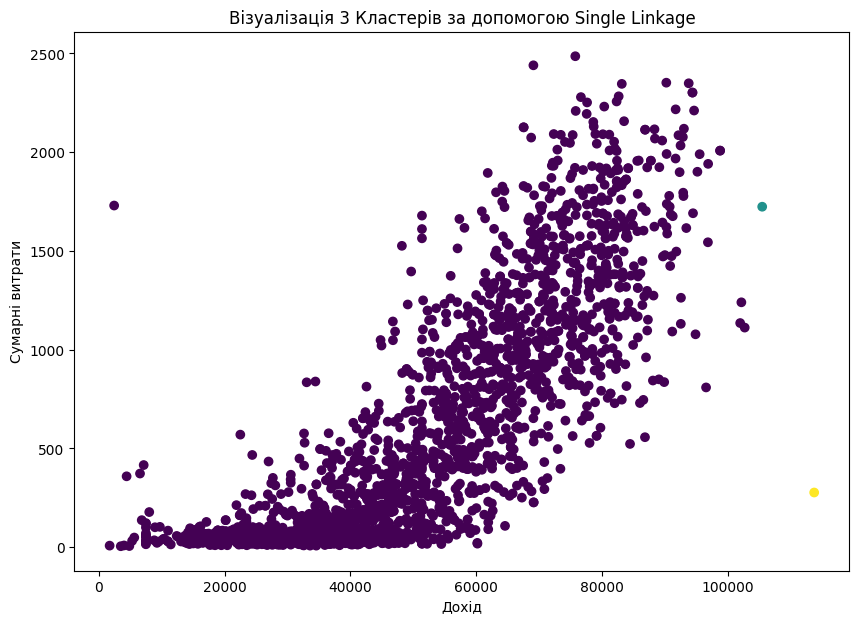

In [171]:
# Варіант з 2 кластерами
labels_2_clusters = fcluster(linked, 2, criterion='maxclust')

# Варіант з 3 кластерами
labels_3_clusters = fcluster(linked, 3, criterion='maxclust')

# Візуалізація кластеризацій
plt.figure(figsize=(10, 7))
plt.scatter(X_no_outliers['Income'], X_no_outliers['Total_Spend'], c=labels_2_clusters, cmap='viridis')
plt.title('Візуалізація 2 Кластерів за допомогою Single Linkage')
plt.xlabel('Дохід')
plt.ylabel('Сумарні витрати')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_no_outliers['Income'], X_no_outliers['Total_Spend'], c=labels_3_clusters, cmap='viridis')
plt.title('Візуалізація 3 Кластерів за допомогою Single Linkage')
plt.xlabel('Дохід')
plt.ylabel('Сумарні витрати')
plt.show()

In [172]:
# Обчислення метрики силуету для 2 кластерів
silhouette_2_clusters = silhouette_score(X_no_outliers, labels_2_clusters)
print(f"Силует для 2 кластерів: {silhouette_2_clusters:.3f}")

# Обчислення метрики силуету для 3 кластерів
silhouette_3_clusters = silhouette_score(X_no_outliers, labels_3_clusters)
print(f"Силует для 3 кластерів: {silhouette_3_clusters:.3f}")

Силует для 2 кластерів: 0.546
Силует для 3 кластерів: 0.464


Метрики силуету для 2 і 3 кластерів свідчать про наступне:

1. Силует для 2 кластерів: 0.546 — це досить хороше значення, що свідчить про те, що кластери є чітко розділеними. Вищий коефіцієнт силуету означає, що точки в кожному кластері ближчі одна до одної та добре відокремлені від інших кластерів.

2. Силует для 3 кластерів: 0.464 — це також пристойне значення, але дещо нижче, ніж для 2 кластерів. Це може означати, що додавання третього кластера зробило розподіл менш чітким, або цей кластер містить точки, які менш добре згруповані.

3. Отже, можна зробити висновок, що кластеризація на 2 кластери є кращим варіантом для даних, якщо основним критерієм є чіткість поділу кластерів. Але кластеризація на 3 кластери також має сенс, якщо є потреба в більш детальному поділі даних, навіть якщо це призводить до деякого зниження чіткості.

За результатами побудованих дендрограм та візуалізацій кластеризації можна зробити наступні висновки:

Кількість кластерів:

У випадку з 2 кластерами ми бачимо, що майже всі точки належать до одного кластеру, за винятком декількох викидів. Це вказує на те, що поділ на 2 кластери не є достатнім для добре структурованого поділу даних.
У випадку з 3 кластерами видно, що кілька точок виділяються в окремі кластери, але основна маса точок все ще залишається в одному кластері. Це також вказує на можливі проблеми з кластеризацією і можливу необхідність подальшого дослідження.
Значення метрики силуету:

Оскільки візуально ми бачимо, що кластери не є чітко розділеними, це може свідчити про те, що метрика силуету може бути низькою, що і підтверджувалось на попередніх етапах аналізу.
В даному випадку, можливо, варто спробувати інші методи кластеризації або переглянути підхід до обробки даних, наприклад, включивши більш складні ознаки або інші способи масштабування даних.
Спостереження:

В обох випадках (2 та 3 кластери) можна помітити, що є кілька дуже віддалених точок (викидів), які створюють окремі кластери самі по собі. Це може свідчити про те, що дані містять аномалії, які необхідно обробити або видалити, щоб отримати більш чіткі кластери.
Загалом, ці результати можуть підказувати, що кластеризація з допомогою агломеративного підходу та single linkage не є оптимальною для цього набору даних. Можливо, варто розглянути інші методи кластеризації або попередньо обробити дані, щоб досягти кращих результатів.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

Спробуємоагломеративне кластерування, тому що воно дозволяє побудувати ієрархічну структуру кластерів, дає гнучкість у визначенні кількості кластерів, та краще підходить для роботи з даними, де кластери можуть мати складні форми або нечіткі межі.

In [177]:
# Налаштовуємо та проводимо кластеризацію за допомогою агломеративного кластерування
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clustering.fit_predict(X_no_outliers)

# Обчислюємо метрику силуету
silhouette_agg = silhouette_score(X_no_outliers, labels_agg)
print(f"Силует для Agglomerative Clustering: {silhouette_agg:.3f}")

# Візуалізація кластерів
fig = px.scatter_3d(
    X_no_outliers,
    x='Income',
    y='Total_Spend',
    z='NumDealsPurchases',
    color=labels_agg,
    title="3D Visualization of Agglomerative Clustering"
)
fig.show()


Силует для Agglomerative Clustering: 0.482


1. Середнє значення метрики силуету становить 0.482. Це значення вказує на відносно непогану якість кластеризації, але не є ідеальним. Це свідчить про те, що деякі об'єкти можуть бути погано кластеризовані або розташовані на межі між кластерами.

2.  На 3D-візуалізації видно, що дані розділились на кілька кластерів. Однак, кластери не є дуже чітко відокремленими, що може свідчити про перетин різних сегментів або присутність шуму в даних. Частина точок все ще виглядає як потенційні викиди, особливо ті, що значно віддалені від основної маси даних.

Вибір агломеративного кластерування дозволив побудувати більш зрозумілу модель кластеризації, яка вказує на потенційні групи клієнтів у даних, навіть якщо результат не є ідеальним.

Висновок:
1. KMeans після видалення викидів показав найвищу метрику силуету (0.499), що свідчить про чіткіший поділ даних на кластери після очищення від викидів.
2. Ієрархічне агломеративне кластерування з Single Linkage показало хороший результат при кластеризації на 2 кластери, але додавання третього кластеру погіршило чіткість поділу. Алее видно, що в обох випадках значна частина даних залишається в одному великому кластері, що може свідчити про недостатню диференціацію.
3. Агломеративне кластерування також дало непоганий результат, але знову ж таки, кластери не були чітко розділені.